In [0]:
url = "https://raw.githubusercontent.com/aashishksahu/Minor_Project/master/data%20-%20data.csv?token=AZjmbbgwmS_1ps7EyeCXED29LQG_ufegks5cUVCGwA%3D%3D"
file = pd.read_csv(url)

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file = pd.read_csv("data.csv")

In [0]:
# visualising the data
data = pd.DataFrame(file)
# shuffling
data = data.sample(frac=1)
# shows the top 5 rows
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
253,8860702,M,17.30,17.08,113.00,928.2,0.10080,0.10410,0.12660,0.08353,...,19.85,25.09,130.90,1222.0,0.1416,0.2405,0.3378,0.18570,0.3138,0.08113
181,873593,M,21.09,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,...,26.68,33.48,176.50,2089.0,0.1491,0.7584,0.6780,0.29030,0.4098,0.12840
381,901836,B,11.04,14.93,70.67,372.7,0.07987,0.07079,0.03546,0.02074,...,12.09,20.83,79.73,447.1,0.1095,0.1982,0.1553,0.06754,0.3202,0.07287
40,855167,M,13.44,21.58,86.18,563.0,0.08162,0.06031,0.03110,0.02031,...,15.93,30.25,102.50,787.9,0.1094,0.2043,0.2085,0.11120,0.2994,0.07146
317,894326,M,18.22,18.87,118.70,1027.0,0.09746,0.11170,0.11300,0.07950,...,21.84,25.00,140.90,1485.0,0.1434,0.2763,0.3853,0.17760,0.2812,0.08198


In [0]:
class util:
    def min_max_scaler(self,arr):
        return ( (arr - np.min(arr))/(np.max(arr) - np.min(arr)) )

    # one_hot maker
    def one_hot(self, vector):
        one_hot_vec = np.zeros([len(vector), 2])
    
        for i in range(len(vector)):
            one_hot_vec[i, vector[i][0]] = 1
       
        return one_hot_vec
    
    # sigmoid function
    def sigmoid(self, z):
        """
            z: input vector
            
            returns vector with sigmoid non-linearity function applied to it        
        """
        e = 0.000001
        z = np.float32(z)
        return 1/(1+np.exp(-z)+e)
    
    # derivative of sigmoid
    def sigmoid_grad(self, z):
        """
            z: input vector
            
            returns vector with sigmoid non-linearity function applied to it        
        """
        return self.sigmoid(z)*(1-self.sigmoid(z))

In [0]:
class NN_model:
    def __init__(self, learning_rate):
        self.learning_rate = learning_rate
        
    def forward_pass(self, Input, weights):
        """
            Input: input sample(s)
            weights: dictionary holding the weights
            
            returns a dictionary of values calculated at each layer
        """
        
        #assigning weights
        w1 = weights["w1"]
        w2 = weights["w2"]
        b1 = weights["b1"]
        b2 = weights["b2"]
        
        
        # network layers
        dense_layer_1 = np.dot(Input, w1) + b1
        dense_layer_2 = np.dot(dense_layer_1, w2) + b2
        activation_layer = util().sigmoid(dense_layer_2)

               
        forward_pass_params = {"Input": Input, "dense_layer_1": dense_layer_1, 
                               "dense_layer_2": dense_layer_2, "logits": activation_layer}
        
        return forward_pass_params
    
    # function for backpropagation
    def backward_pass(self, labels, params, weights):
        """
            labels: label for each training set (1 or 0)
            params: values calculated at each layer
            weights: dictionary holding the weights
            
            returns updated weights 
        """
        
        #assigning weights
        w1 = weights["w1"]
        w2 = weights["w2"]
        b1 = weights["b1"]
        b2 = weights["b2"]
        
        # assigning forward pass parameters
        Input = params["Input"]
        l1 = params["dense_layer_1"]
        l2 = params["dense_layer_2"]
        a  = params["logits"]
        
        # no. of training samples
        n = l1.shape[0]
        
        
        # backprop (basically chain rule)
        d_loss_da  = -(1/n) * (a - labels)
        
        # dL/dw2 = dL/da -> da/dl2 -> dl2/dw2
        d_loss_dw2 = np.dot( np.multiply(d_loss_da, util().sigmoid_grad(l2)).T, l1 ).T
        # dL/dw2 = dL/da -> da/dl2 -> dl2/db2
        d_loss_db2 = np.dot(d_loss_da.T, util().sigmoid_grad(l2))
        
        # dL/dw1 = dL/da -> da/dl2 -> dl2/dl1 -> dl1/dw1
        d_loss_dl2 = np.multiply(d_loss_da, util().sigmoid_grad(l2))
        d_loss_dl1 = np.dot(d_loss_dl2, w2.T)
        d_loss_dw1 = np.dot(Input.T, d_loss_dl1) 
        
        # dL/db1 = dL/da -> da/dl2 -> dl2/dl1 -> dl1/db1
        d_loss_db1 = np.dot(np.ones([1,n]), d_loss_dl1)
                
        
        # updating weights
        w1 = w1 + self.learning_rate*d_loss_dw1
        w2 = w2 + self.learning_rate*d_loss_dw2
        b1 = b1 + self.learning_rate*d_loss_db1
        b2 = b2 + self.learning_rate*d_loss_db2
        
   
        
        # storing updated weights in dictionary
        weights["w1"] = w1
        weights["w2"] = w2
        weights["b1"] = b1
        weights["b2"] = b2
        
        return weights

In [0]:
def get_Loss(yhat, y):
    """
        yhat: predctions 
        y   : actual labels
        
    """
    # calculate loss
    Loss = -np.mean(  np.multiply(y,np.log(yhat)) + np.multiply((1-y), np.log(1-yhat)) )
    
    return Loss

In [0]:
# preparing data for input

# fetching all the column names
cl_names = list(data.keys())

# replacing Malignant(M) and Benign(B) with 1 and 0 resp.
diagnosis_flag = np.array(data[cl_names[1]])

for i in range(len(diagnosis_flag)):
    if diagnosis_flag[i] == "M":
        diagnosis_flag[i] = 1
    else:
        diagnosis_flag[i] = 0

# splitting ratio
split = int(len(data)*0.8)

# Training set
in_train = np.array(data[cl_names[2:32]][0: split])
target_train = diagnosis_flag[0:split]
target_train = target_train.reshape(len(target_train), 1)
in_train = util().min_max_scaler(in_train)


# test set
in_test = np.array(data[cl_names[2:32]][split:len(data)])
target_test = diagnosis_flag[split: len(diagnosis_flag)]
target_test = target_test.reshape(len(target_test), 1)
in_test = util().min_max_scaler(in_test)


print("input (train): ", in_train.shape)
print("labels (train): ", target_train.shape)
print("input (test): ", in_test.shape)
print("labels (test): ", target_test.shape)

input (train):  (455, 30)
labels (train):  (455, 1)
input (test):  (114, 30)
labels (test):  (114, 1)


In [0]:
# initialising weights from normal distribution
weight_dict = {"w1": np.random.normal(0,1, [30,5]),
               "w2": np.random.normal(0,1, [5,1]),
               "b1": np.random.normal(0,1, [1, 5]),
               "b2": np.random.normal(0,1, [1, 1])}

# initialising training model
nn = NN_model(0.45)

# list to save loss 
loss_list = []

# no. of iterations
epochs = 2000

# initialising training loop
for i in range(epochs):
    
    # forward pass
    forward_out = nn.forward_pass(in_train, weight_dict)
    
    # backward pass
    weight_dict = nn.backward_pass(target_train, forward_out, weight_dict)
    
    loss_list.append(get_Loss(forward_out["logits"], target_train))

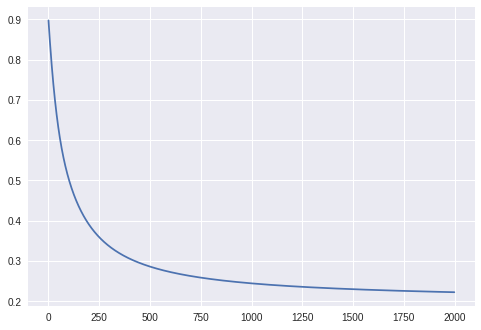

In [0]:
plt.plot(range(0, epochs), loss_list)
plt.show()

In [0]:
# function checks for true positives and true negatives
def true_checker(pred, org):
    """
        pred: prediction vector
        
        returns 1 for true positives and true negatives, 0 otherwise
    """
    # convert probabilities into discrete signals (0 and 1)
    for i in range(len(pred)):
        if pred[i] > 0.5:
            pred[i] = 1
        else:
            pred[i] = 0
    
    # checks for eqality
    true_checker_list = [int(pred[i] == org[i]) for i in range(len(org))]
    return true_checker_list

In [0]:
# training accuracy
train_pred = nn.forward_pass(in_train, weight_dict)
train_pred = train_pred["logits"]
true_checks_train = true_checker(train_pred, target_train)
train_accuracy = np.sum(true_checks_train)/len(train_pred) * 100
print("training set accuracy: ", train_accuracy, "%")

# testing accuracy
test_pred = nn.forward_pass(in_test, weight_dict)
test_pred = test_pred["logits"]
true_checks_test = true_checker(test_pred, target_test)
test_accuracy = np.sum(true_checks_test)/len(test_pred) * 100
print("testing set accuracy: ", test_accuracy, "%")

training set accuracy:  90.76923076923077 %
testing set accuracy:  91.22807017543859 %
